In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Deep-Learning/Deep-Learning/(05) تصنيف بريد إلكتروني إلى مزعج أم لا باستخدام الشبكات العصبية/emails.csv')
df.head()

,Spam,Message
0,0,Please call me at 8
1,1,Free money is available for you
2,0,I study he studies they are students I studied...
3,1,I am working at office now to 9 evening
4,0,U dun say so early hor... U c already then say...


In [16]:
pip install nltk

In [17]:
import nltk

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

nltk.download('punkt')

nltk.download('stopwords')

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
text="Hi: I am working on spam classification!"

tokens = word_tokenize(text.lower())
tokens

['hi', ':', 'i', 'am', 'working', 'on', 'spam', 'classification', '!']

In [19]:
import string

tokens = [token for token in tokens if token not in string.punctuation]
tokens

['hi', 'i', 'am', 'working', 'on', 'spam', 'classification']

In [20]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:
stop_words = stopwords.words('english')

tokens = [token for token in tokens if token not in stop_words]
tokens

['hi', 'working', 'spam', 'classification']

In [22]:
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [23]:
print(len(stop_words))

198


In [24]:
stemmer = PorterStemmer()

tokens = [stemmer.stem(token) for token in tokens]
tokens

['hi', 'work', 'spam', 'classif']

In [25]:
ps = PorterStemmer()

print(ps.stem("computer"))
print(ps.stem("computation"))
print(ps.stem("compute"))
print(ps.stem("computed"))
print(ps.stem("computers"))

comput
comput
comput
comput
comput


In [26]:
import re

def preprocess_text(text):

    tokens = word_tokenize(text.lower())

    tokens = [token for token in tokens if token not in string.punctuation]

    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    preprocessed_text = ' '.join(tokens)

    preprocessed_text = re.sub(r'http\S+|www\S+', '', preprocessed_text)

    preprocessed_text = re.sub(r'\d+', '', preprocessed_text)
    return preprocessed_text

In [27]:
email = "Hello! These are 5678 examples of emails for spam classification. "

preprocessed_email = preprocess_text(email)
print(preprocessed_email)

hello  exampl email spam classif


In [28]:
df['processed_Message'] = df['Message'].apply(preprocess_text)

df

,Spam,Message,processed_Message
0,0,Please call me at 8,pleas call
1,1,Free money is available for you,free money avail
2,0,I study he studies they are students I studied...,studi studi student studi yesterday
3,1,I am working at office now to 9 evening,work offic even
4,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...
...,...,...,...
5222,0,"It‘s reassuring, in this crazy world.",‘ reassur crazi world
5223,0,Oh... Okie lor...We go on sat...,oh ... oki lor ... go sat ...
5224,1,You are awarded a SiPix Digital Camera! call 0...,award sipix digit camera call landlin deliver...
5225,0,"Hey chief, can you give me a bell when you get...",hey chief give bell get need talk royal visit ...


In [29]:
df_spam = df[df['Spam']==1]

In [30]:
pip install wordcloud

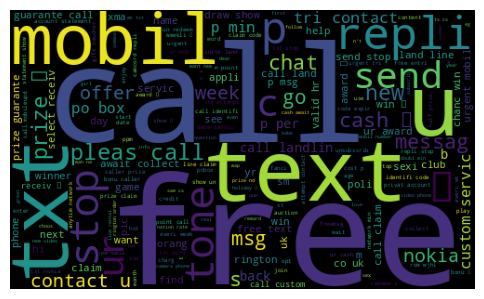

In [31]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

spam_words_list = df_spam['processed_Message'].astype(str)

spam_words_str = ' '.join(spam_words_list)

spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words_str)

plt.figure(figsize=(6, 4))

plt.imshow(spam_wordcloud)

plt.axis("off")

plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

documents = [
    "My cat and dog sat on the mat",
    "strange cat jumped over the mat",
    "His cat ate the mouse ran across the mat",
    "Her dog run after my cat and mouse",
]

max_features=6

count_vectorizer = CountVectorizer(max_features=max_features)

vectors = count_vectorizer.fit_transform(documents)

print(vectors)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16 stored elements and shape (4, 6)>
  Coords	Values
  (0, 4)	1
  (0, 0)	1
  (0, 1)	1
  (0, 5)	1
  (0, 2)	1
  (1, 0)	1
  (1, 5)	1
  (1, 2)	1
  (2, 0)	1
  (2, 5)	2
  (2, 2)	1
  (2, 3)	1
  (3, 4)	1
  (3, 0)	1
  (3, 1)	1
  (3, 3)	1


In [33]:
feature_names = count_vectorizer.get_feature_names_out()

print("Feature Names:")
print(feature_names)

Feature Names:
['cat' 'dog' 'mat' 'mouse' 'my' 'the']


In [34]:
print(vectors.toarray())

[[1 1 1 0 1 1]
 [1 0 1 0 0 1]
 [1 0 1 1 0 2]
 [1 1 0 1 1 0]]


In [35]:
example_df = pd.DataFrame(data=vectors.toarray(),columns=feature_names)

example_df

,cat,dog,mat,mouse,my,the
0,1,1,1,0,1,1
1,1,0,1,0,0,1
2,1,0,1,1,0,2
3,1,1,0,1,1,0


In [36]:
frequencies = vectors.toarray().sum(axis=0)

sorted_indices = frequencies.argsort()[::-1]
sorted_feature_names = [feature_names[idx] for idx in sorted_indices]
sorted_frequencies = frequencies[sorted_indices]


for i in range(len(sorted_feature_names)):
    print(sorted_feature_names[i], ": ", sorted_frequencies[i])

the :  4
cat :  4
mat :  3
my :  2
mouse :  2
dog :  2


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

print("\nTF-IDF Vectorization:")

feature_names=tfidf_vectorizer.get_feature_names_out()

example_df = pd.DataFrame(data=tfidf_vectors.toarray(),columns=feature_names)
example_df


TF-IDF Vectorization:


,cat,dog,mat,mouse,my,the
0,0.341846,0.516470,0.418127,0.000000,0.516470,0.418127
1,0.500491,0.000000,0.612172,0.000000,0.000000,0.612172
2,0.304813,0.000000,0.372830,0.460519,0.000000,0.745660
3,0.356966,0.539313,0.000000,0.539313,0.539313,0.000000


In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

corpus = df['processed_Message']


max_features = 100

count_vectorizer = CountVectorizer(max_features=max_features)

vectors = count_vectorizer.fit_transform(corpus)

tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus)

In [39]:
from sklearn.model_selection import train_test_split

X = vectors

y = df['Spam']

X = X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8623 - loss: 0.4849
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9429 - loss: 0.1694
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9532 - loss: 0.1241
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9678 - loss: 0.0942
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9710 - loss: 0.0909
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9695 - loss: 0.0928
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9719 - loss: 0.0873
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0795
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9759 - loss: 0.0753
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9759 - loss: 0.0826


In [41]:
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 97.09


In [42]:
from sklearn.model_selection import train_test_split

X = tfidf_vectors

y = df['Spam']

X = X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8355 - loss: 0.5198
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9034 - loss: 0.2314
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9497 - loss: 0.1521
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1119
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 0.1159
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9626 - loss: 0.1074
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.1109
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9663 - loss: 0.0985
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0866
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.0955


In [44]:
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 97.02


In [45]:
message="porn star is waiting for you to be here a daddy"

processed_message=preprocess_text(message)

vector=tfidf_vectorizer.transform([processed_message])
vector_dense=vector.toarray()

y_pred_prob = model.predict(vector_dense)

y_pred = np.round(y_pred_prob)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.]]
